# Title of ML project : Telangana Regional Transport Authority Vehicle Online Sales Data 01-01-2025 to 31-01-2025

# Name : Renjitha E Re

# Organization : Entri Elevate

https://www.telanganatribune.com/wp-content/uploads/2024/09/telangana-government-establishes-agriculture-education-and-bc-commissions.webp

# Overview of Problem Statement

In 2025, a significant number of vehicles will require insurance renewal. The goal of this project is to predict the number of vehicles that need insurance renewal in 2025 using machine learning techniques. This prediction is crucial for insurance companies, government agencies, and vehicle owners to plan ahead, allocate resources efficiently, and ensure seamless insurance renewal processes.

# Objective

Predicting the number of vehicles that need insurance renewal in 2025

# Data Description

Source Of Data: The dataset collected from Telengana Government Site

# Feature

slno                   :	Serial number of the record.
modelDesc              :	Description of the vehicle model.
fuel                   :	Type of fuel used (e.g., Petrol, Diesel, Electric).
colour                 :	Vehicle color.
vehicleClass           :	Category of the vehicle (e.g., Motor Cycle, Goods Carriage).
makeYear               :	The manufacturing year of the vehicle.
seatCapacity           :	Number of seats in the vehicle.
insuranceValidity      :	The expiry date of the vehicle's insurance.
secondVehicle          :	Indicates whether this is the owner's second vehicle (Y or N).
tempRegistrationNumber :	Temporary registration number of the vehicle.
category               :	Specifies if the vehicle is Transport or Non-Transport.
makerName              : 	Name of the vehicle manufacturer (e.g., Honda, Bajaj, Ashok Leyland).
OfficeCd               :	Code of the registering office (RTO).
fromdate               :	Registration start date.
to date                :	Registration end date.

# Data Collection

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
import joblib

In [176]:
# Load the dataset
df = pd.read_csv('ts_transport_online_sales_01_01_2025to31_01_2025.csv')

In [178]:
df.head(5)

,slno,modelDesc,fuel,colour,vehicleClass,makeYear,seatCapacity,insuranceValidity,secondVehicle,tempRegistrationNumber,category,makerName,OfficeCd,fromdate,todate
0,1,TVS JUPITER 113 BSVI-PH2,PETROL,GL COPPER,MOTOR CYCLE,01/12/2024,2,31/12/2029,N,TG09QTR2266,Non Transport,TVS MOTOR COMPANY LTD,RTA-HYDERABAD-WZ,01/01/2025,01/01/2025
1,2,KTM - 250 DUKE BSVI-PH2,PETROL,EBONY BLACK(MET),MOTOR CYCLE,01/12/2024,2,31/12/2029,N,TG07LTR7586,Non Transport,BAJAJ AUTO LTD,RTA RANGAREDDY,01/01/2025,01/01/2025
2,3,SHINE 125 DRUM BSVI-PH2,PETROL,REBEL RED METALLIC 2,MOTOR CYCLE,01/11/2024,2,31/12/2029,N,TG08KTR6798,Non Transport,HONDA MOTORCYCLE&SCOOTER(I)P L,RTA-HYDERABAD-NZ,01/01/2025,01/01/2025
3,4,UE2825/39 T TIP BGS 16 CU M 295/90R20 BSVI-PH2,DIESEL,YELLOW CABIN AND GRAY LOAD BODY,Goods Carriage,01/11/2024,2,31/12/2025,N,TG10GTR2075,Transport,ASHOK LEYLAND LTD,RTA MEDCHAL,01/01/2025,01/01/2025
4,5,SHINE 125 DISK BSVI-PH2,PETROL,BLACK,MOTOR CYCLE,01/12/2024,2,30/12/2029,N,TG08KTR6920,Non Transport,HONDA MOTORCYCLE&SCOOTER(I)P L,UNIT OFFICE PATANCHERUVU,01/01/2025,01/01/2025


In [180]:
df.tail(5)

,slno,modelDesc,fuel,colour,vehicleClass,makeYear,seatCapacity,insuranceValidity,secondVehicle,tempRegistrationNumber,category,makerName,OfficeCd,fromdate,todate
70428,70429,AMAZE 3RD GEN ZX MT(I-VTEC) BSVI-PH2,PETROL,PLATINUM WHITE,MOTOR CAR,01/01/2025,5,30/01/2028,N,TG08LTR4594,Non Transport,HONDA CARS INDIA LTD,RTA MEDCHAL,31/01/2025,31/01/2025
70429,70430,INNOVA HYCROSS HYBRID ZX(7S) BSVI-PH2,PETROL,SUPER WHITE,MOTOR CAR,01/01/2025,7,30/01/2028,N,TG07MTR6426,Non Transport,TOYOTA KIRLOSKAR MOTOR PVT LTD,RTA UPPAL,31/01/2025,31/01/2025
70430,70431,ACTIVA 125 SMART. BSVI-PH2,PETROL,P BLACK,MOTOR CYCLE,01/01/2025,2,30/01/2030,Y,TG09RTR4579,Non Transport,HONDA MOTORCYCLE&SCOOTER(I)P L,RTA-HYDERABAD-EZ,31/01/2025,31/01/2025
70431,70432,PASSION + I 3S DRS BSVI-PH2,PETROL,BLACK GREY STRIPES,MOTOR CYCLE,01/07/2024,2,30/01/2030,N,TG09RTR4549,Non Transport,HERO MOTOCORP LTD,RTA RANGAREDDY,31/01/2025,31/01/2025
70432,70433,MARUTI XL6 SMART HYBRID ALPHA 1.5L5MT BSVI-PH2,PETROL,SPLENDID SILVER,MOTOR CAR,01/02/2024,6,30/01/2028,N,TG09RTR4413,Non Transport,"MARUTI SUZUKI INDIA LTD.,",RTA MEDCHAL,31/01/2025,31/01/2025


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70433 entries, 0 to 70432
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   slno                    70433 non-null  int64 
 1   modelDesc               70433 non-null  object
 2   fuel                    69285 non-null  object
 3   colour                  70368 non-null  object
 4   vehicleClass            70433 non-null  object
 5   makeYear                70433 non-null  object
 6   seatCapacity            70433 non-null  int64 
 7   insuranceValidity       70391 non-null  object
 8   secondVehicle           70433 non-null  object
 9   tempRegistrationNumber  70433 non-null  object
 10  category                70433 non-null  object
 11  makerName               70433 non-null  object
 12  OfficeCd                70433 non-null  object
 13  fromdate                70433 non-null  object
 14  todate                  70433 non-null  object
dtypes:

In [184]:
df.describe()

,slno,seatCapacity
count,70433.000000,70433.000000
mean,35217.000000,2.608280
std,20332.400092,2.310843
min,1.000000,0.000000
25%,17609.000000,2.000000
50%,35217.000000,2.000000
75%,52825.000000,2.000000
max,70433.000000,60.000000


# Data Preprocessing - Data Cleaning

In [186]:
# Convert 'insuranceValidity' to datetime
df['insuranceValidity'] = pd.to_datetime(df['insuranceValidity'], errors='coerce')

In [188]:
# Extract the year of insurance validity
df['insuranceYear'] = df['insuranceValidity'].dt.year

In [190]:
print(df)

        slno                                        modelDesc    fuel  \
0          1                         TVS JUPITER 113 BSVI-PH2  PETROL   
1          2                          KTM - 250 DUKE BSVI-PH2  PETROL   
2          3                          SHINE 125 DRUM BSVI-PH2  PETROL   
3          4  UE2825/39 T TIP BGS 16 CU M  295/90R20 BSVI-PH2  DIESEL   
4          5                          SHINE 125 DISK BSVI-PH2  PETROL   
...      ...                                              ...     ...   
70428  70429             AMAZE 3RD GEN ZX MT(I-VTEC) BSVI-PH2  PETROL   
70429  70430            INNOVA HYCROSS HYBRID ZX(7S) BSVI-PH2  PETROL   
70430  70431                       ACTIVA 125 SMART. BSVI-PH2  PETROL   
70431  70432                      PASSION + I 3S DRS BSVI-PH2  PETROL   
70432  70433   MARUTI XL6 SMART HYBRID ALPHA 1.5L5MT BSVI-PH2  PETROL   

                                colour    vehicleClass    makeYear  \
0                            GL COPPER     MOTOR CYCL

In [192]:
# Count vehicles needing renewal in 2025
renewals_2025 = df[df['insuranceYear'] == 2025].shape[0]

print("Number of vehicles needing renewal in 2025:", renewals_2025)

Number of vehicles needing renewal in 2025: 941


In [202]:
df.isnull().sum()

slno                      0
modelDesc                 0
fuel                      0
colour                    0
vehicleClass              0
makeYear                  0
seatCapacity              0
insuranceValidity         0
secondVehicle             0
tempRegistrationNumber    0
category                  0
makerName                 0
OfficeCd                  0
fromdate                  0
todate                    0
insuranceYear             0
dtype: int64

In [196]:
df['fuel'].fillna("Unknown", inplace=True)

In [198]:
df['colour'].fillna("Not Specified", inplace=True)  # Fill with a placeholder

In [200]:
df.dropna(subset=['insuranceValidity'], inplace=True)

In [156]:
df.isnull().sum()

slno                      0
modelDesc                 0
fuel                      0
colour                    0
vehicleClass              0
makeYear                  0
seatCapacity              0
insuranceValidity         0
secondVehicle             0
tempRegistrationNumber    0
category                  0
makerName                 0
OfficeCd                  0
fromdate                  0
todate                    0
insuranceYear             0
dtype: int64

In [204]:
df.duplicated().sum()

0

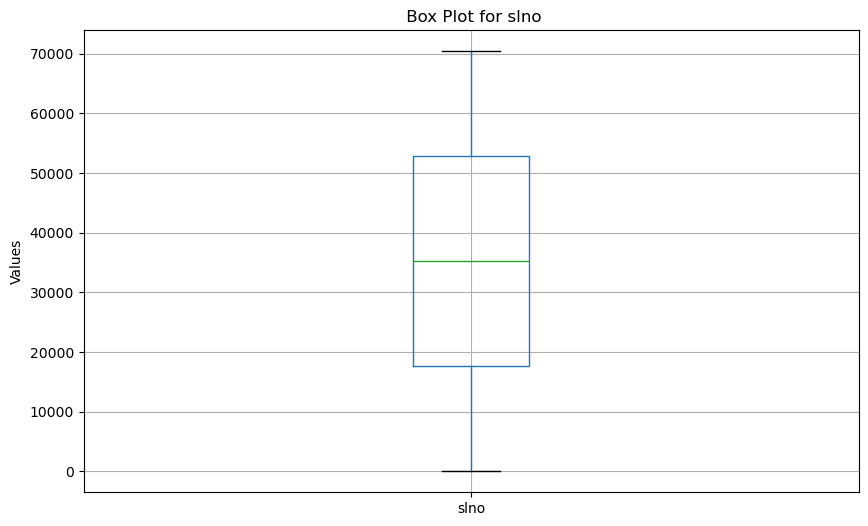

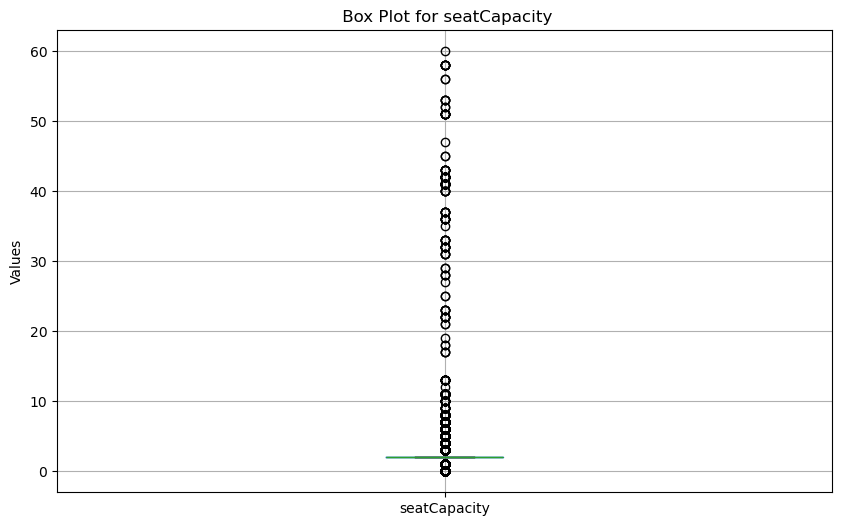

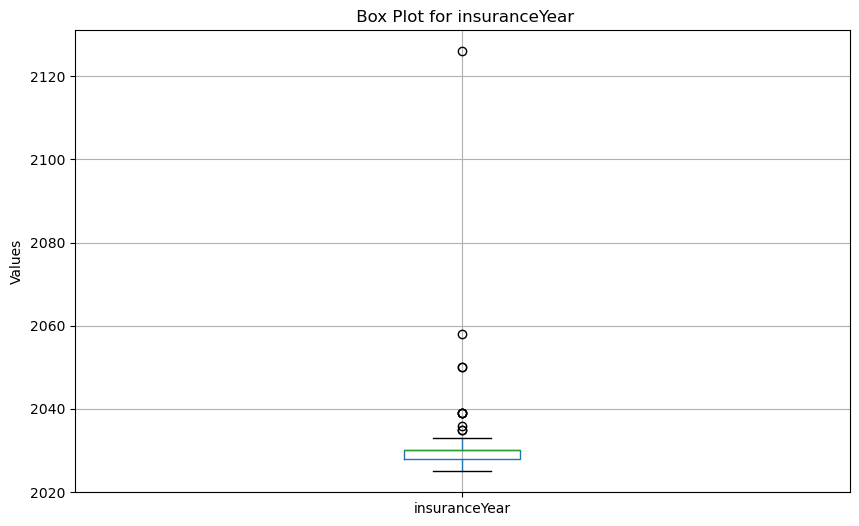

In [206]:
# Box Plot for visualize outliers
columns = df.select_dtypes(include = ['number'])

for col in columns.columns:
    plt.figure(figsize=(10,6))
    columns.boxplot(column = col)
    plt.title(f" Box Plot for {col}")
    plt.ylabel('Values')
    plt.show()

In [208]:
# Outlier's removel with IQR
def handle_outlier(df):
    for col in df.select_dtypes(include = ['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        lower = Q1 - 1.5 *IQR
        upper = Q3 + 1.5 *IQR

        df[col] = df[col].apply(lambda x: 
        lower if x<lower else 
        upper if x>upper else
        x)
    return df
df1 = handle_outlier(df)

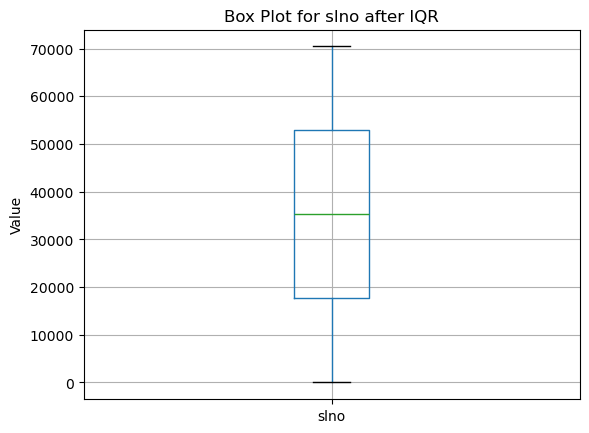

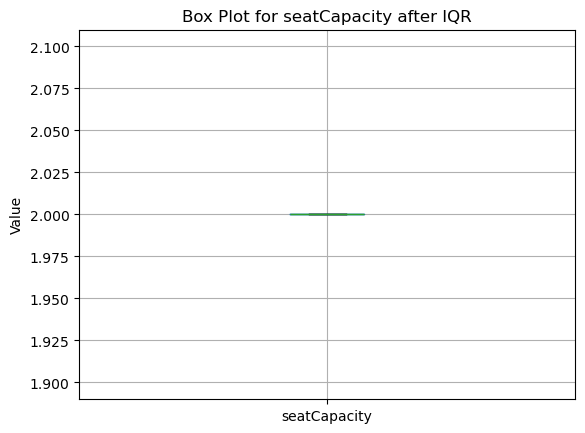

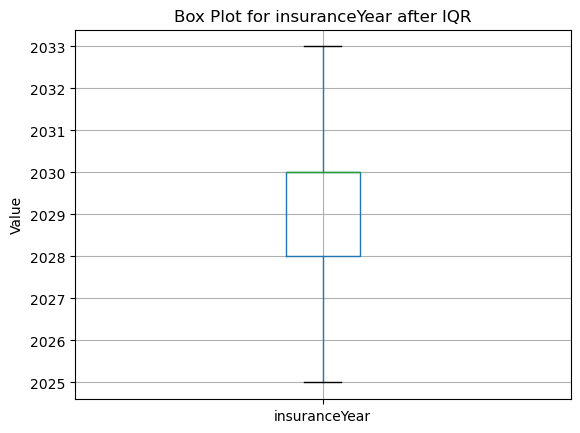

In [210]:
# Box-Plot after removing outliers
column = df1.select_dtypes(include=['int64','float64'])

for col in column.columns:
    plt.figure()
    column.boxplot(column = col)
    plt.title(f"Box Plot for {col} after IQR")
    plt.ylabel('Value')
    plt.show()

# Exploratory Data Analysis (EDA)

In [236]:
print(df.columns)

Index(['slno', 'modelDesc', 'fuel', 'colour', 'vehicleClass', 'makeYear',
       'seatCapacity', 'insuranceValidity', 'secondVehicle',
       'tempRegistrationNumber', 'category', 'makerName', 'OfficeCd',
       'fromdate', 'todate', 'insuranceYear'],
      dtype='object')


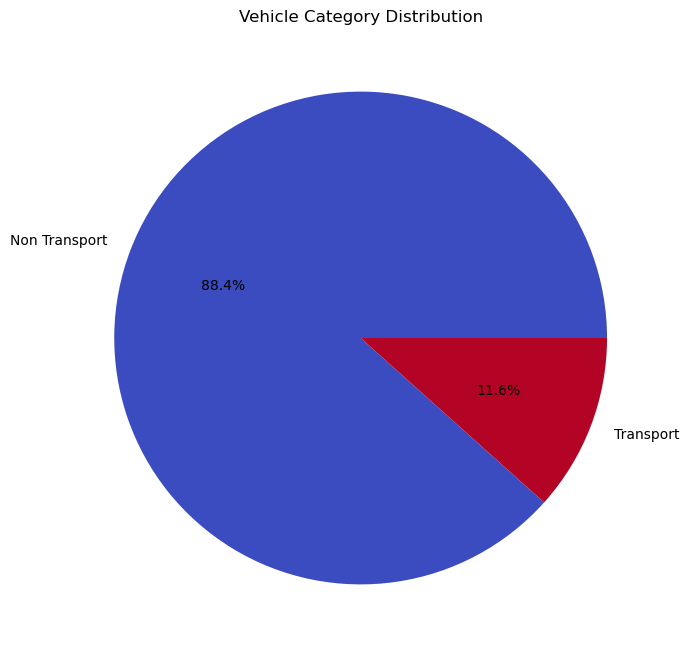

In [261]:
# Pie Chart - Distribution of vehicle categories
plt.figure(figsize=(8, 8))
df['category'].value_counts().plot.pie(autopct='%1.1f%%', cmap='coolwarm')
plt.title("Vehicle Category Distribution")
plt.ylabel("")
plt.show()

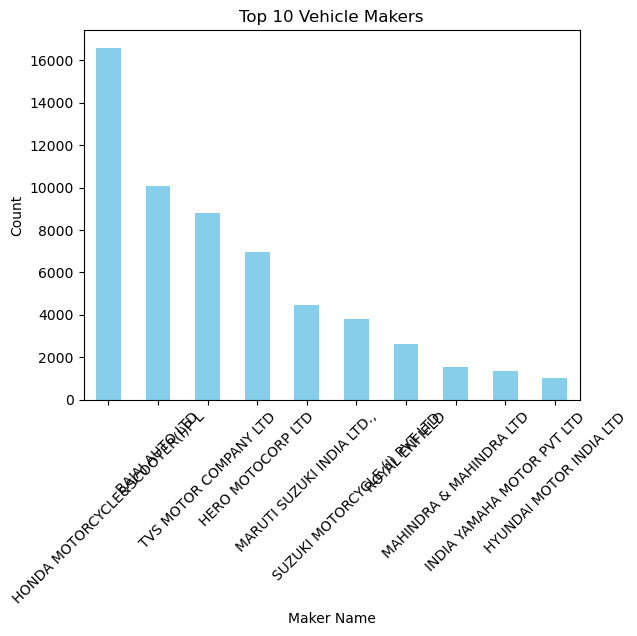

In [263]:
# Bar Plot - Top 10 vehicle makers
top_makers = df['makerName'].value_counts().head(10)
top_makers.plot(kind='bar', color='skyblue')
plt.title("Top 10 Vehicle Makers")
plt.xlabel("Maker Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

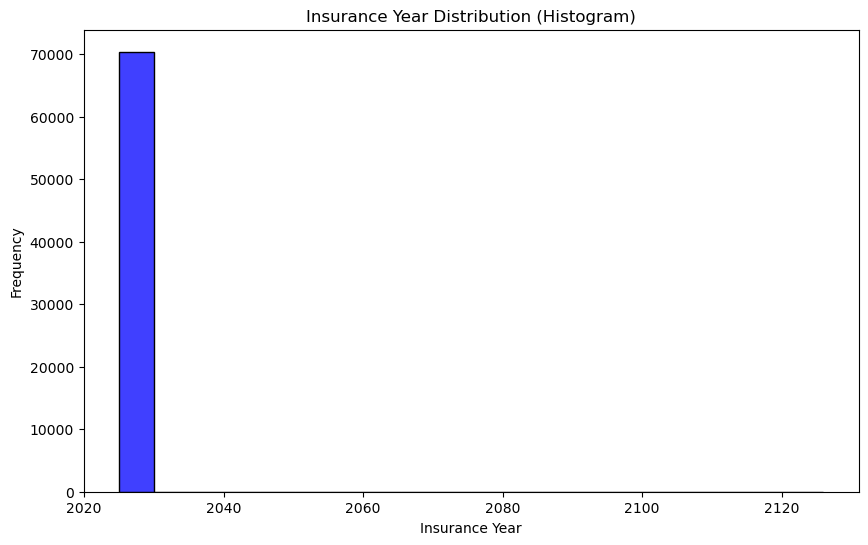

In [279]:
# Histogram for Insurance Year Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['insuranceYear'].dropna(), bins=20, kde=False, color='blue')
plt.title("Insurance Year Distribution (Histogram)")
plt.xlabel("Insurance Year")
plt.ylabel("Frequency")
plt.show()

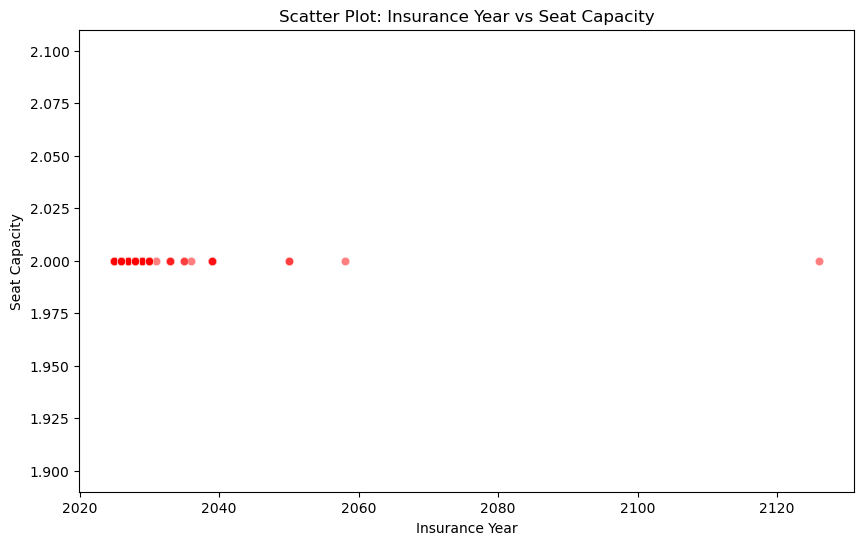

In [281]:
# Scatter Plot (Insurance Year vs Seat Capacity, if seatCapacity exists)
if 'seatCapacity' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['insuranceYear'], y=df['seatCapacity'], alpha=0.5, color='red')
    plt.title("Scatter Plot: Insurance Year vs Seat Capacity")
    plt.xlabel("Insurance Year")
    plt.ylabel("Seat Capacity")
    plt.show()

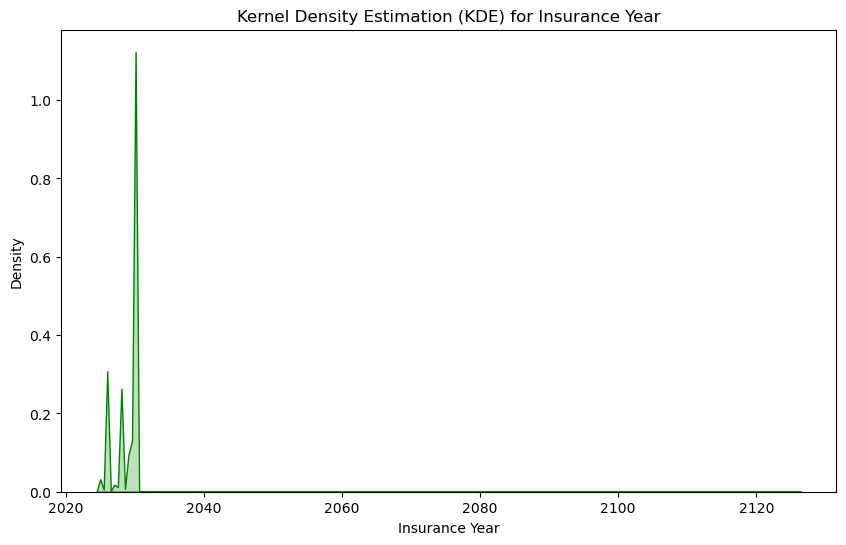

In [285]:
# Kernel Density Estimation (KDE) for Insurance Year
plt.figure(figsize=(10, 6))
sns.kdeplot(df['insuranceYear'].dropna(), fill=True, color='green')
plt.title("Kernel Density Estimation (KDE) for Insurance Year")
plt.xlabel("Insurance Year")
plt.ylabel("Density")
plt.show()

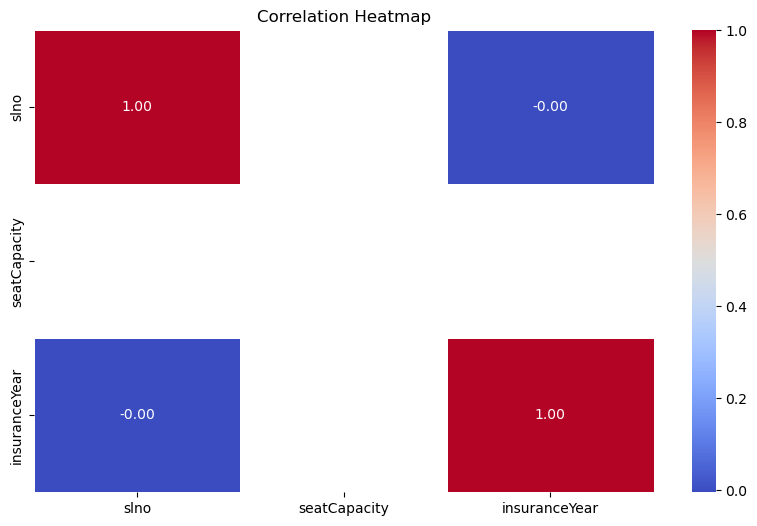

In [244]:
# Generate heatmap for numerical columns only
numerical_df = df.select_dtypes(include=['number'])  # Select only numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Feature Selection

In [292]:
# Filter vehicles with insurance expiring in 2025
df_2025 = df[(df['insuranceValidity'] >= '2025-01-01') & (df['insuranceValidity'] <= '2025-12-31')]

In [296]:
# Feature selection
features = ['modelDesc', 'fuel', 'vehicleClass', 'makeYear', 'seatCapacity', 'category', 'makerName']

In [298]:
# Convert categorical features to numerical
df_2025_encoded = pd.get_dummies(df_2025[features])

In [300]:
df_2025_encoded['insuranceRenewal'] = 1  # Label indicating renewal needed

In [302]:
# Splitting dataset into training and testing sets
X = df_2025_encoded.drop(columns=['insuranceRenewal'])
y = df_2025_encoded['insuranceRenewal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [304]:
# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [306]:
# Get feature scores
feature_scores = pd.DataFrame({'Feature': X_train.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print("Top Features Selected:")
print(feature_scores)

Top Features Selected:
                                               Feature  Score
0                                         seatCapacity    0.0
285                                makeYear_01/12/2023    0.0
311               makerName_KUBOTA CORPORATION,  JAPAN    0.0
310                makerName_KISAN INDUSTRIES SURYAPET    0.0
309                   makerName_KISAN AGRO ENGG CO KNR    0.0
..                                                 ...    ...
148         modelDesc_MAHINDRA YUVO TECH+475 DI BSIIIA    0.0
147         modelDesc_MAHINDRA YUVO TECH+415 DI BSIIIA    0.0
146     modelDesc_MAHINDRA YUVO TECH+405 DI 2WD BSIIIA    0.0
145  modelDesc_MAHINDRA SUPRO PROFITTRUCK MINI VX B...    0.0
454         makerName_siri agro engg works, karimnagar    0.0

[455 rows x 2 columns]


# Split Data into Training and Testing Sets

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [311]:
# Check the shapes of the resulting datasets
print("Training feature set shape:", X_train.shape)
print("Testing feature set shape:", X_test.shape)
print("Training target set shape:", y_train.shape)
print("Testing target set shape:", y_test.shape)

Training feature set shape: (752, 455)
Testing feature set shape: (189, 455)
Training target set shape: (752,)
Testing target set shape: (189,)


# Feature Scaling

In [314]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)